**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

from scipy import optimize
import sympy as sm

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [3]:
# Define the symbols
L, w, tau, alpha, nu, kappa, G, w_tilde = sm.symbols('L w tau alpha nu kappa G \\tilde{w}')

# Define the utility function
#w_tilde = (1-tau) * w
#C = kappa + w_hat * L
V = sm.log((kappa + w_tilde * L)**alpha * G**(1 - alpha)) - nu * L**2 / 2 # use C = kappa + w_tilde * L and w_tilde = (1-tau) * w

# Differentiate the utility function with respect to labor supply (L)
V_diff = sm.diff(V, L)

# Set the first-order condition (FOC) to zero and solve for L
L_star = sm.solve(V_diff, L)
L_star[0]

(-kappa*nu - sqrt(nu*(4*\tilde{w}**2*alpha + kappa**2*nu)))/(2*\tilde{w}*nu)

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

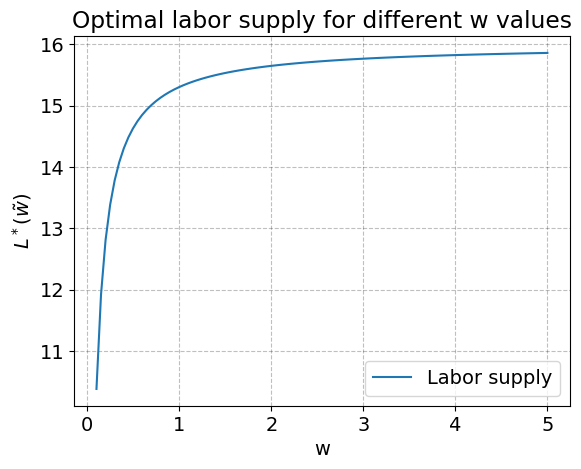

In [4]:
# set parameter values
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * 16**2)
w = 1.0
tau = 0.30
w_tilde = (1-tau)*w

# define worker utility
def worker_utility(C, G, L, nu=nu, alpha=alpha):
    return np.log(C**alpha * G**(1-alpha)) - nu * L**2 / 2

# define the L*(w_hat) formula
def optimal_labor_supply(w_tilde=w_tilde, kappa=kappa, alpha=alpha, nu=nu):
    sqrt = np.sqrt(kappa**2 + 4*(alpha/nu)*(w_tilde)**2)
    return (-kappa + sqrt) / (2*(w_tilde))

# define the range of w
w_values = np.linspace(0.1, 5, 100)

# calculate L*(w_hat) for each w combination
L_values = optimal_labor_supply(w_tilde=(1 - tau) * w_values)

# plot the results
fig, ax = plt.subplots()

# plot worker utility
ax.plot(w_values, L_values, label='Labor supply')

# set labels and title
ax.set_xlabel('w')
ax.set_ylabel(f'$L^*$$(\\tilde{{w}})$')
ax.set_title(f'Optimal labor supply for different w values')

# display the legend
ax.legend()

# show the plot
plt.show()



We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


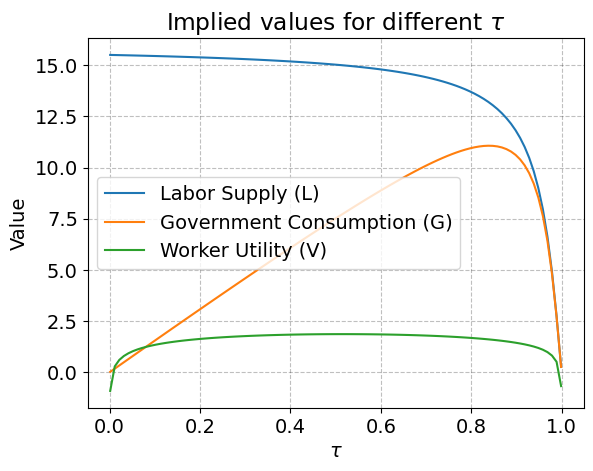

In [5]:
# set tau values
tau_values = np.linspace(0.001, 0.999, 100)


# Calculate implied values
L_values = optimal_labor_supply(w_tilde=(1 - tau_values) * w)
G_values = tau_values * w * L_values
C_values = kappa + (1 - tau_values) * w * L_values
worker_utility_values = worker_utility(C_values, G_values, L_values)

# Plot the results
fig, ax = plt.subplots()

# Plot L
ax.plot(tau_values, L_values, label='Labor Supply (L)')

# Plot G
ax.plot(tau_values, G_values, label='Government Consumption (G)')

# Plot worker utility
ax.plot(tau_values, worker_utility_values, label='Worker Utility (V)')

# Set labels and title
ax.set_xlabel(f'$\\tau$')
ax.set_ylabel('Value')
ax.set_title(f'Implied values for different $\\tau$')

# Display the legend
ax.legend()

# Show the plot
plt.show()


**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

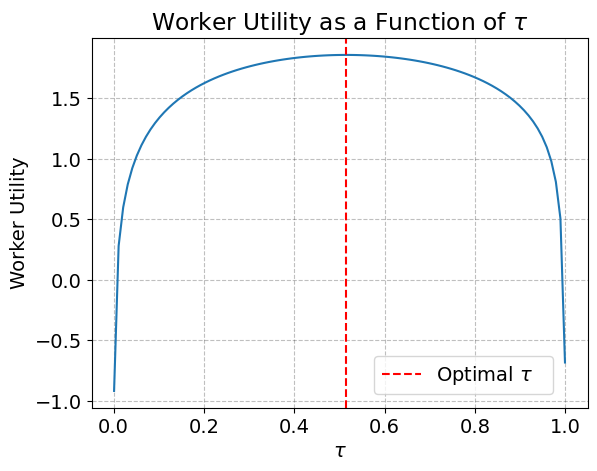

The socially optimal tax rate (tau*) is: 0.515


In [6]:
# find the optimal tax rate
optimal_tau = tau_values[np.argmax(worker_utility_values)]

# plot the worker utility
plt.plot(tau_values, worker_utility_values)
plt.axvline(x=optimal_tau, color='r', linestyle='--', label=f'Optimal $\\tau$')
plt.xlabel(f'$\\tau$')
plt.ylabel('Worker Utility')
plt.title(f'Worker Utility as a Function of $\\tau$')
plt.legend(frameon=True, bbox_to_anchor=(0.55, 0.01, 0.4, 0.2), loc="lower right", mode="expand")
plt.show()

print(f"The socially optimal tax rate (tau*) is: {optimal_tau:.3f}")

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{\sigma-1} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [19]:
def utility_alt(L, alpha, kappa, tau, w, G, sigma, rho, nu, epsilon):
    return (((alpha * (kappa + (1-tau)*w*L)**((sigma-1)/sigma) + (1-alpha) * G**((sigma-1)/sigma))**(sigma/(sigma-1)))**(1-rho) - 1) / (1-rho) - nu * L**(1+epsilon) / (1+epsilon)

def neg_utility_alt(L, alpha, kappa, tau, w, G, sigma, rho, nu, epsilon):
    return -utility_alt(L, alpha, kappa, tau, w, G, sigma, rho, nu, epsilon)

def solve_worker_problem_alt(alpha, kappa, tau, w, sigma, rho, nu, epsilon):
    # initial guesses
    L0 = 1
    G0 = 1

    # find opt_L for given G
    opt_L_result = optimize.minimize(neg_utility_alt, L0, args=(alpha, kappa, tau, w, G0, sigma, rho, nu, epsilon), method='Nelder-Mead', tol=1e-8)

    if not opt_L_result.success:
        raise Exception("Could not find optimal labor supply.")

    opt_L = opt_L_result.x[0]

    # find G that satisfies the equation
    def equation(G):
        return G - tau * w * opt_L

    G_result = optimize.root(equation, G0)

    if not G_result.success:
        raise Exception("Could not find G.")

    G = G_result.x[0]

    # calculate the utility at the optimal labor supply and G
    util = utility_alt(opt_L, alpha, kappa, tau, w, G, sigma, rho, nu, epsilon)

    return util, opt_L, G

def find_optimal_tax_rate(alpha, kappa, w, sigma, rho, nu, epsilon):
    # initial guess
    tau0 = optimal_tau

    # find tau that maximizes worker utility
    opt_tau_result = optimize.minimize(lambda tau: -solve_worker_problem_alt(alpha, kappa, tau, w, sigma, rho, nu, epsilon)[0], tau0, method='Nelder-Mead', tol=1e-8)

    if not opt_tau_result.success:
        raise Exception("Could not find optimal tax rate.")

    tau_star = opt_tau_result.x[0]

    # calculate the utility, opt_L, and G at the optimal tax rate
    utility_star, opt_L_star, G_star = solve_worker_problem_alt(alpha, kappa, tau_star, w, sigma, rho, nu, epsilon)

    return tau_star, utility_star, opt_L_star, G_star


util, L1_alt, G1_alt = solve_worker_problem_alt(alpha, kappa, optimal_tau, w, sigma_set1, rho_set1, nu, epsilon_set1)
util, L2_alt, G2_alt = solve_worker_problem_alt(alpha, kappa, optimal_tau, w, sigma_set2, rho_set1, nu, epsilon_set2)
print(rf'set 1: we find G to be {G1_alt:.4f} with an optimal labor supply of {L1_alt:.4f}')
print(rf'set 2: we find G to be {G2_alt:.4f} with an optimal labor supply of {L2_alt:.4f}')

set 1: we find G to be 7.8094 with an optimal labor supply of 15.1603
set 2: we find G to be 9.1639 with an optimal labor supply of 17.7898


**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [21]:
tau_star1, utility_star1, opt_L_star1, G_star1 = find_optimal_tax_rate(alpha, kappa, w, sigma_set1, rho_set1, nu, epsilon_set1)
tau_star2, utility_star2, opt_L_star2, G_star2 = find_optimal_tax_rate(alpha, kappa, w, sigma_set2, rho_set2, nu, epsilon_set2)

print(rf'set 1: the socially optimal tax rate is: {tau_star1:.4f}')
print(rf'set 2: the socially optimal tax rate is: {tau_star2:.4f}')

set 1: the socially optimal tax rate is: 0.5124
set 2: the socially optimal tax rate is: 0.5343


## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

We start looking at the numerical solutions:

In [10]:
#We set our variables:
eta = 0.5
w = 1.0
kappa_values = [1.0, 2.0]

#We insert our given variables into the functions:
for kappa in kappa_values:
    l_optimal = ((1 - eta) * kappa / w) ** (1 / eta)
    profits_optimal = kappa * l_optimal ** (1 - eta) - w * l_optimal
  
    print(f"For kappa = {kappa}:")
    print(f"Optimal ell_t: {l_optimal}")
    print(f"Optimal profits: {profits_optimal}\n")

For kappa = 1.0:
Optimal ell_t: 0.25
Optimal profits: 0.25

For kappa = 2.0:
Optimal ell_t: 1.0
Optimal profits: 1.0



We find that for $\kappa=2$ will the profit be highest.

Now we investigate whether this is the maximized profit:

In [11]:
# deifne the optimal labor
def optimal_labor(theta, w, kappa):
    return (((1-eta)*kappa)/w)**(1/eta)

# define profits
def profit(x, eta=0.5, w=1.0):
    l, kappa = x
    return -(kappa * l ** (1-eta) - w * l)

# set initial guess and bounds
x0 = (1., 1.5)
bounds = ((0, np.inf), (1,2))

# call solver
res = optimize.minimize(profit, x0, method='Nelder-Mead', bounds=bounds, tol=1e-8)

# save results
optimal_l = res.x[0]
optimal_kappa = res.x[1]

# print
print(rf'The optimal labor that maximizes profits is {optimal_l:.2f} for kappa = {optimal_kappa}' + '\n')

# we check if this result is equal to the analytically solution given in the assignment
print('Is the numerical and analytical solution identical?')
print(np.isclose(optimal_l, optimal_labor(0.5, 1., optimal_kappa)))

The optimal labor that maximizes profits is 1.00 for kappa = 2.0

Is the numerical and analytical solution identical?
True


We can hereby verify that $\kappa=2$ maximizes profits

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

We can calculate the expected value of the salon, $H$, by simulating different shock series with the given variables.

In [12]:
# set parameters
eta = 0.5
w = 1.0
rho = 0.90
jota = 0.01
sigma = 0.10
R_monthly = (1 + 0.01)**(1/12)

# time horizon
T = 120

# number of simulations
K = 10000 

# set zero vector
H_values = np.zeros(K)

# simulate process
np.random.seed(69)
for k in range(K):
    l = 0
    l_prev = 0
    kappa = 1
    total_profit = 0
    
    for t in range(T):
        # draw shock
        if t == 0:
            epsilon = 0
        else:
            epsilon = np.random.normal(-0.5*sigma**2, sigma)
        # update kappa
        kappa = np.exp(rho*np.log(kappa) + epsilon)
        # labor policy
        l = ((1-eta)*kappa / w)**(1/eta)
        # profits
        profit = kappa*l**(1-eta) - w*l - int(l != l_prev)*jota
        # discount profits
        total_profit += profit / R_monthly**t
        # update l_prev for next iteration
        l_prev = l

    H_values[k] = total_profit

# expected value
H_1 = H_values.mean()

print("Expected value of the firm:", H_1) 

Expected value of the firm: 27.752237076132467


Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

We adjust the code from question 2 such that we only adjust the hairdresser level if the absolute difference between previous and optimal level is greater than $\Delta=0.05$

In [17]:
# set Delta
Delta = 0.05

# set zero vector
H_values = np.zeros(K)

# simulation
np.random.seed(69)
for k in range(K):
    # starting values
    l = 0
    l_prev = 0
    kappa = 1
    total_profit = 0
    
    for t in range(T):
        # draw shock
        if t == 0:
            epsilon = 0
        else:
            epsilon = np.random.normal(-0.5*sigma**2, sigma)
        # update kappa
        kappa = np.exp(rho*np.log(kappa) + epsilon)
        # optimal labor policy without constraint
        l_star = ((1-eta)*kappa / w)**(1/eta)
        # actual labor policy with constraint
        if np.abs(l_prev - l_star) > Delta:
            l = l_star
        else:
            l = l_prev
        # profits
        profit = kappa*l**(1-eta) - w*l - int(l != l_prev)*jota
        # discount profits
        total_profit += profit / R_monthly**t
        # update l_prev for next iteration
        l_prev = l

    H_values[k] = total_profit

# expected value
H_2 = H_values.mean()

print("Expected value of the firm:", H_2)

Expected value of the firm: 28.432444759561214


We find this policy does not improve the profitability, as H_1>H_2

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

We can find the optimal $\Delta$ by performing a grid search over a range of $\Delta$ values and compute $H$ for each value.

Optimal Delta: 0.081
Maximum expected value of the firm: 28.648


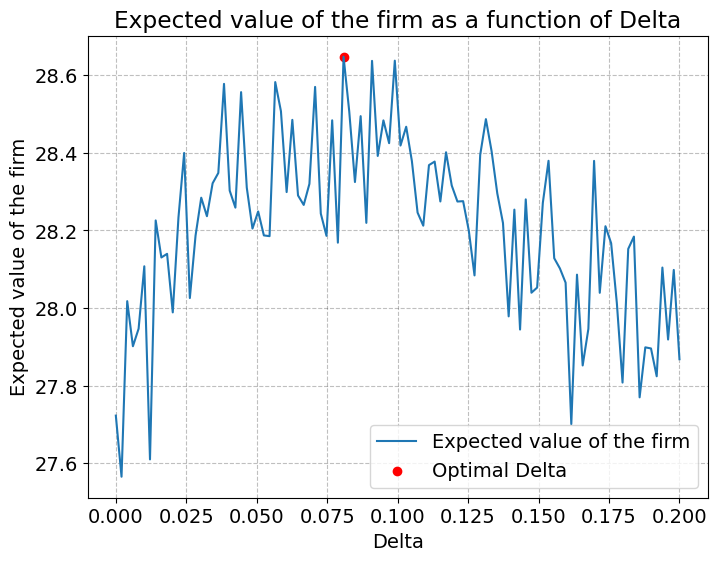

In [18]:
# set new number of simulations
K = 1000  # Increase this number to improve the approximation

# range of Delta values to try
Delta_values = np.linspace(0, 0.2, 100)

# array to store results
H_values = np.zeros(len(Delta_values))

# simulate process for each Delta
np.random.seed(69)
for i, Delta in enumerate(Delta_values):
    H = np.zeros(K)
    for k in range(K):
        l = 0
        l_prev = 0
        kappa = 1
        total_profit = 0

        for t in range(T):
            # draw shock
            if t == 0:
                epsilon = 0
            else:
                epsilon = np.random.normal(-0.5*sigma**2, sigma)
            # update kappa
            kappa = np.exp(rho*np.log(kappa) + epsilon)
            # optimal labor policy without constraint
            l_star = ((1-eta)*kappa / w)**(1/eta)
            # actual labor policy with constraint
            if np.abs(l_prev - l_star) > Delta:
                l = l_star
            else:
                l = l_prev
            # profits
            profit = kappa*l**(1-eta) - w*l - int(l != l_prev)*jota
            # discount profits
            total_profit += profit / R_monthly**t
            # update l_prev for next iteration
            l_prev = l

        H[k] = total_profit

    # expected value
    H_values[i] = H.mean()

# find Delta that maximizes H
optimal_index = np.argmax(H_values)
optimal_Delta = Delta_values[optimal_index]

print(f"Optimal Delta: {optimal_Delta:.3f}")
print(f"Maximum expected value of the firm: {H_values[optimal_index]:.3f}")

# plot H as a function of Delta
plt.figure(figsize=(8, 6))
plt.plot(Delta_values, H_values, label='Expected value of the firm')
plt.scatter(optimal_Delta, H_values[optimal_index], color='red', label='Optimal Delta')
plt.xlabel('Delta')
plt.ylabel('Expected value of the firm')
plt.title('Expected value of the firm as a function of Delta')
plt.legend()
plt.grid(True)
plt.show()



**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



To improve the profitability we will adjust the hairdresser level based on the cumulative profitability over a certain period. If the cumulative profitability falls below a specified threshold, we will decrease the hairdresser level, and if it exceeds another threshold, we will increase the hairdresser level.

We will consider the following policy:
- If cumulative profit is below the lower threshold, we reduce the labor by a factor proportional to the negative difference.
- If cumulative profit is above the upper threshold, we increase the labor by a factor proportional to the positive difference.

In [ ]:
# set new parameters
lower_threshold = -0.05  # Lower threshold for cumulative profitability
upper_threshold = 0.05  # Upper threshold for cumulative profitability
lookback_period = 5  # Period to calculate cumulative profitability

# set number of simulations back
K = 10000  # Increase this number to improve the approximation

# initialization
H_values = np.zeros(K)

# simulation
np.random.seed(69)
for k in range(K):
    l = 0
    l_prev = 0
    kappa = 1
    total_profit = 0
    profits = []

    for t in range(T):
        # draw shock
        if t == 0:
            epsilon = 0
        else:
            epsilon = np.random.normal(-0.5*sigma**2, sigma)
        # update kappa
        kappa = np.exp(rho*np.log(kappa) + epsilon)
        # optimal labor policy without constraint
        l_star = ((1-eta)*kappa / w)**(1/eta)
        # actual labor policy with constraint
        if t >= lookback_period:
            cum_profit = sum(profits[-lookback_period:])
            if cum_profit < lower_threshold:
                l = max(0.95 * l_star, 0)  # decrease labor but not below 0
            elif cum_profit > upper_threshold:
                l = 1.05 * l_star  # increase labor
            else:
                l = l_star
        else:
            l = l_star
        # profits
        profit = kappa*l**(1-eta) - w*l - int(l != l_prev)*jota
        profits.append(profit)
        # discount profits
        total_profit += profit / R_monthly**t
        # update l_prev for next iteration
        l_prev = l

    H_values[k] = total_profit

# expected value
H = H_values.mean()

print("Expected value of the firm:", H)

In [16]:
# Determine the policy with the highest profit
max_H = max(H_1, H_2, H_3, H_4)
if max_H == H_1:
    print("The policy from Question 2 yields the highest profit.")
elif max_H == H_2:
    print("The policy from Question 3 (Delta = 0.05) yields the highest profit.")
elif max_H == H_3:
    print("The policy from Question 4 (Optimal Delta) yields the highest profit.")
else:
    print("The policy from Question 5 (Alternative Policy) yields the highest profit.")
print(f"H1: {H_1:.3f}")
print(f"H2: {H_2:.3f}")
print(f"H3: {H_3:.3f}")
print(f"H4: {H_4:.3f}")

NameError: name 'H_2' is not defined

We find that our alternative policy does not improve the profitability compared to the other questions.

The best policy is to follow $\ell^*_t$.

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [ ]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

In [ ]:
# define the refined global optimizer algorithm  
def refined_global_optimizer(bounds, tau, K_, K):

    # step 1: chosen bounds and tolerance
    bounds = bounds
    tau = tau
    
    # step 2: set number of warm-up and maximum number of iterations
    K_ = K_
    K = K

    # create vectors
    x_star = None
    trials = []

    # set seed
    np.random.seed(2506)

    # loop for each element in K
    for k in range(K):
        # step 3.A: draw random uniformly within chosen bounds
        x_k = np.random.uniform(bounds[0], bounds[1], size=2)

        if k >= K_:
            # step 3.C: calculate chi
            chi = 0.5 * 2 / (1 + np.exp((k - K_) / 100))
            # step 3.D: calculate effective initial guess
            x_k0 = chi * x_k + (1 - chi) * x_star
        else:
            x_k0 = x_k

        # append trials
        trials.append(x_k0)

        # step 3.E: call optimizer with x_k0 as initial guess
        result = optimize.minimize(griewank, x_k0, method='BFGS', tol=tau)
        x_k_star = result.x

        # step 3.F:
        if k == 0 or result.fun < griewank(x_star):
            x_star = x_k_star

        # step 3.G: check for break
        if result.fun < tau:
            break

    return x_star, trials

In [ ]:
# run the refined global optimizer
res, trials = refined_global_optimizer(bounds=[-600, 600], tau=1e-8, K_=10, K=1000)

# plot the variation of effective initial guesses with iteration counter
trials = np.array(trials)
it = np.arange(len(trials))

# print results
print(rf'Optimal solution: (x_1, x_2) = ({res[0]:.5f}, {res[1]:.5f})')
print(rf'interations: {len(it)}')

# illustrate conversion
plt.figure()
plt.plot(it, trials[:, 0], label='$x_1^{k0}$')
plt.plot(it, trials[:, 1], label='$x_2^{k0}$')
plt.xlabel('Iteration Counter (k)')
plt.ylabel(f'Effective Initial Guesses, $x^{{k0}}$')
plt.title('Variation of Effective Initial Guesses with Iteration Counter')
plt.legend()
plt.show()

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [ ]:
# Run the refined global optimizer with K_ = 100
res, trials = refined_global_optimizer(bounds=[-600, 600], tau=1e-8, K_=100, K=1000)

# plot the variation of effective initial guesses with iteration counter
trials = np.array(trials)
it = np.arange(len(trials))

# print results
print(rf'Optimal solution: (x_1, x_2) = ({res[0]:.5f}, {res[1]:.5f})')
print(rf'interations: {len(it)}')

# illustrate conversion
plt.figure()
plt.plot(it, trials[:, 0], label='$x_1^{k0}$')
plt.plot(it, trials[:, 1], label='$x_2^{k0}$')
plt.xlabel('Iteration Counter (k)')
plt.ylabel(f'Effective Initial Guesses, $x^{{k0}}$')
plt.title('Variation of Effective Initial Guesses with Iteration Counter')
plt.legend()
plt.show()

No, it is not better to set K=100, as it now converges slower.